In [1]:
!pip install --upgrade pip

In [2]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [3]:
!pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

ERROR: JPype1-1.1.2-cp38-cp38-win_amd64.whl is not a supported wheel on this platform.


In [4]:
!pip install konlpy

In [5]:
# 한글 형태소 분류기
from konlpy.tag import Okt, Kkma

In [6]:
okt = Okt()
# 형태소 별로 분류
okt.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가신다']

In [7]:
kkma = Kkma()
kkma.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

In [8]:
text = '아버지가방에들어가신다'
okt.pos(text) # 어떤 형태소인지 분류해서 대상을 알려줌

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [9]:
kkma.pos(text)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [10]:
okt.tagset # 분류할 수 있는 형태소를 나열

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [11]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [12]:
okt.nouns(text) # 명사만 추출

['아버지', '가방']

In [13]:
!pip install sklearn numpy pandas matplotlib

In [14]:
# countvectorizer와 연결해서 사용하기(BOW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [15]:
text = ['천혜향 맛있어요'
       '저는 어제 25 21을 봤습니다'
       '삼겹살 맛있어요']

In [16]:
cv.fit(text)

CountVectorizer()

In [17]:
cv.vocabulary_ # 띄어쓰기 단위로 토큰화

{'천혜향': 6, '맛있어요저는': 3, '어제': 5, '25': 1, '21을': 0, '봤습니다삼겹살': 4, '맛있어요': 2}

In [18]:
def mytoken(text): # 토큰화 방법 정의 함수
    return okt.nouns(text)

In [19]:
cv_okt = CountVectorizer(tokenizer = mytoken)

In [20]:
cv_okt.fit(text)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function mytoken at 0x00000217AB00DE50>)

In [21]:
cv_okt.vocabulary_

{'천혜향': 3, '저': 2, '어제': 1, '삼겹살': 0}

In [22]:
import pandas as pd

# 문제 정의
- 한글 영화 리뷰 데이터셋으로 감성 분석을 진행
- kolnpy를 사용해서 형태소 분류

# 데이터 수집

In [23]:
text_train = pd.read_csv('./data/ratings_train.txt', delimiter = '\t')
text_test = pd.read_csv('./data/ratings_test.txt', delimiter = '\t')

In [24]:
text_train.shape

(150000, 3)

In [25]:
text_test.shape

(50000, 3)

In [26]:
text_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 데이터 전처리

In [27]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


## 결측지 삭제

In [28]:
# 결측지가 존재하는 행을 삭제
text_train.dropna(inplace = True)
text_test.dropna(inplace = True)

In [29]:
X_train = text_train['document'][:10000]
y_train = text_train['label'][:10000]
X_test = text_test['document'][:1000]
y_test = text_test['label'][:1000]

## 토큰화

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
def mytoken(text): # 토큰화 방법 정의 함수
    return okt.nouns(text)

In [74]:
tf_okt = TfidfVectorizer(tokenizer = mytoken)

In [31]:
cv_okt = CountVectorizer(tokenizer = mytoken)

In [75]:
tf_okt.fit(X_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function mytoken at 0x00000217AC428AF0>)

In [32]:
cv_okt.fit(X_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function mytoken at 0x00000217AC428AF0>)

In [76]:
len(tf_okt.vocabulary_)

10089

In [33]:
len(cv_okt.vocabulary_)

10089

In [34]:
# 수치화
X_train_okt = cv_okt.transform(X_train)
X_test_okt = cv_okt.transform(X_test)

In [35]:
X_train_okt.shape

(10000, 10089)

In [77]:
X_train_tf = tf_okt.transform(X_train)

## 파이프라인
- 기능을 연결하는 역활, 데이터 분석 순서에 맞게 기능을 연결
- Bow , LinearRegression
- 3, 4, 5, 6단계가 한번에 진행

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

### 토큰화, 수치화, 모델학습

In [49]:
pipe_model = make_pipeline(CountVectorizer(tokenizer = mytoken),
                          LogisticRegression())

In [90]:
pipe_model.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function mytoken at 0x00000217AC428AF0>)),
                ('logisticregression', LogisticRegression())])

### 결과 확인

In [51]:
# score 확인
pipe_model.score(X_test,y_test)

0.727

In [55]:
pipe_cv = pipe_model.steps[0][1]

In [61]:
voca = pipe_cv.vocabulary_

In [59]:
pipe_lr = pipe_model.steps[1][1]

In [62]:
word_weight = pipe_lr.coef_

### GridSeaarch

In [67]:
from sklearn.model_selection import GridSearchCV

In [69]:
# gridsearch를 위한 변수 지정
param_grid = {
    'countvectorizer__max_df' : [100, 200, 300],
    'countvectorizer__min_df' : [10, 20, 30],
    'countvectorizer__ngram_range' : [(1,1), (1,2),(1,3)],
    'logisticregression__C' : [0.01, 0.1, 1, 10, 100]
}

In [70]:
grid  = GridSearchCV(pipe_model, param_grid, cv = 5)

In [71]:
grid.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

In [ ]:
# 가장 결과가 좋은 파라미터
grid.best_params_

In [ ]:
# 가장 좋은 결과
grid.best_score

In [ ]:
final_pipe_model = make_pipeline_CountVectorizerline(CountVectorizer(max_df = ,
                                                 min_df = ,
                                                ngram_range = ),
                                LinearRegression(C = ))
final_pipe_medel.fit(X_train, y_train)

# 탐색적 데이터 분석

# 모델 선택 및 하이퍼 파라미터 튜닝

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
X_train_okt

<10000x10089 sparse matrix of type '<class 'numpy.int64'>'
	with 57482 stored elements in Compressed Sparse Row format>

In [79]:
lr_model = LogisticRegression()

# 학습

In [39]:
lr_model.fit(X_train_okt, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
lr_model.fit(X_train_tf, y_train)

LogisticRegression()

# 평가

In [84]:
lr_model.score(X_train_tf, y_train)

0.8506

In [82]:
lr_model.score(X_train_okt, y_train)

0.8228

In [83]:
lr_model.score(X_test_okt, y_test)

0.71

# 감성분석

In [85]:
voca = tf_okt.vocabulary_
word_weight = lr_model.coef_

In [42]:
voca = cv_okt.vocabulary_ # 단어사전
word_weight = lr_model.coef_ # 단어가 가지고 있는 가중치

In [86]:
df = pd.DataFrame([voca.keys(),
                  voca.values()]) # voca 데이터를 데이터 프레임으로 변환

df = df.T # 행과 열을 전치해서 변환
df_sorted = df.sort_values(by = 1) # 단어사전 index 순서대로 정렬 
# 이유: word_weight가 순서대로 있어서
df_sorted['coef'] = word_weight.reshape(-1) # 가중치를 데이터 프레임에 추가
df_sorted.sort_values(by = 'coef', inplace = True) # 가중치를 기준으로 정렬
top30_df = pd.concat([
    df_sorted.head(30), # 가중치가 높을 30개
    df_sorted.tail(30) # 가중치가 낮은 30개
])

In [64]:
import matplotlib.pyplot as plt
import matplotlib

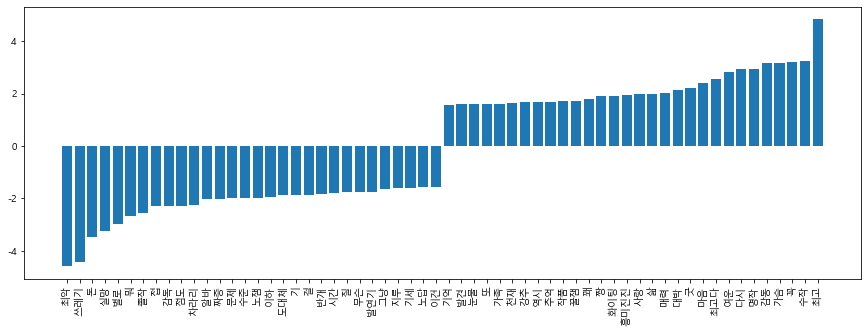

In [87]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name) # 한글을 지원하는 폰트로 변경

matplotlib.rcParams['axes.unicode_minus'] = False # -값 표현

plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()

In [88]:
top30_df

,0,1,coef
418,최악,8449,-4.591035
168,쓰레기,5219,-4.431126
211,돈,2008,-3.475645
388,실망,5109,-3.230479
137,별로,3650,-2.977263
396,뭐,3142,-2.661687
371,졸작,7744,-2.551832
2057,접,7477,-2.299788
256,감독,130,-2.288303
1647,점도,7462,-2.287045
